<a href="https://colab.research.google.com/github/kaajalguptaa/AI_Gender_Detection/blob/main/Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gender Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



by Kajal kumari S

**Team ID**   : PTID-AI-MAY-25-1126

**Project ID**: PRAICP-1001-GenderDetection

This project demonstrates how CNNs can be applied  to predict from a giving picture, if the input image is male or female.



* CNNs effectively extract features from input images, enabling accurate discrimination between Gender

#### **OVERVIEW**

  * Dataset containing images of gender(male and female)
  
  * The categories used for gender classification are: male and female

  * Photos are  reduced to a single size as they have different proportions
  


#### **PROBLEM DESCRIPTION**

  * Image preprocessing -  to predict the Gender from face of the person.

  * ML model to predict the class

#### **FEATURES**

 * This dataset contains
 * Two class - Man, Women



#### **PREPARING THE TOOLS**

**IMPORTING MODULES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from PIL import Image
import zipfile              # to handle compressed dataset
import os                   # to manage file paths and directories
from io import BytesIO          #to work with binary data in memory
import base64            # for encoding and decoding binary data

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score

from sklearn.preprocessing import LabelEncoder

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

**TENSORFLOW MODULES**

In [ ]:
import tensorflow as tf
import cv2

import random as rn
from random import shuffle
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import layers


from keras.utils import to_categorical
from keras.preprocessing import image

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation

from tensorflow.keras.optimizers import Adam

from IPython.core.display import display, HTML


#### **PREPROCESSING THE DATASET**

Resizing the **image** to fit into the **input size** of the model

* **base_dir**    -    to store dataset(unzipped)

* **os.makedirs** - new directory for above dataset

* **zip_ref.extractall(base_dir)** - place dateset after extracting inside base_dir

* **batch** - no of images to process in one time during training

* **img_size** - resized images

#### **Mounting the drive to unzip the dataset folder**

In [ ]:
zip_file = '/content/drive/MyDrive/AI_Project2/PRAICP-1001-GenderDetc.zip'
base_dir = 'gender/'
os.makedirs(base_dir, exist_ok = True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall(base_dir)




In [ ]:
print(os.listdir('/content/gender/Data/gender_dataset_face'))

['woman', 'man']


* Above directory

In [ ]:
X = []
Y = []

img_size = 150

Dir_for_Male = '/content/gender/Data/gender_dataset_face/man'
Dir_for_Female = '/content/gender/Data/gender_dataset_face/woman'

#### **Assigning lables for all two category of gender**

In [ ]:
def labels(image, Gender_type):
  return Gender_type

In [ ]:
def train_set(Gender_type, dir):
  for image_name in tqdm(os.listdir(dir)):
    label = labels(image_name, Gender_type)
    path = os.path.join(dir, image_name)
    image = cv2.imread(path, cv2.IMREAD_COLOR)

    if image is not None:
        image = cv2.resize(image, (img_size, img_size))
        X.append(np.array(image))
        Y.append(str(label))
    else:
        print(f"Warning: Could not load image from {path}")


* Call above function to display labelled Gender category

In [ ]:
train_set('Man', Dir_for_Male)

print(len(X))

 73%|███████▎  | 859/1174 [00:01<00:00, 779.89it/s]

100%|██████████| 1174/1174 [00:01<00:00, 731.26it/s]

1173


In [ ]:
train_set('Women', Dir_for_Female)
print(len(X))

 82%|████████▏ | 933/1135 [00:00<00:00, 1262.45it/s]

100%|██████████| 1135/1135 [00:00<00:00, 1182.98it/s]

2307


#### **VISUALIZATION**

* To check above images belong to correct class after labelling and seperating them

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)

for i in range(4):
  for j in range(2):
    l = rn.randint(0,len(Y))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Gender: '+str(Y[l]))

plt.tight_layout()

plt.savefig('Gender_visualization_before_encoding.png')

* Convolutional layers

  * It employs filters or kernels to convolve across the input image
  * It captures various features at different spatial scales.
  * It learns to recognize the characteristic of both gender class by the features
  
This contributes  the model for classification decisions,

* **Label EnCoding** : Encoding the above two class

In [ ]:
Y_original = list(Y)
print(Y_original)

['Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man'

In [ ]:
LE = LabelEncoder()
Y_encoded = LE.fit_transform(Y_original)

Y = to_categorical(Y_encoded,num_classes = 2)
X = np.array(X)
X = X/255

print(X.shape)
print(Y.shape)

(2307, 150, 150, 3)
(2307, 2)


Checking the class labelled correctly after encoding

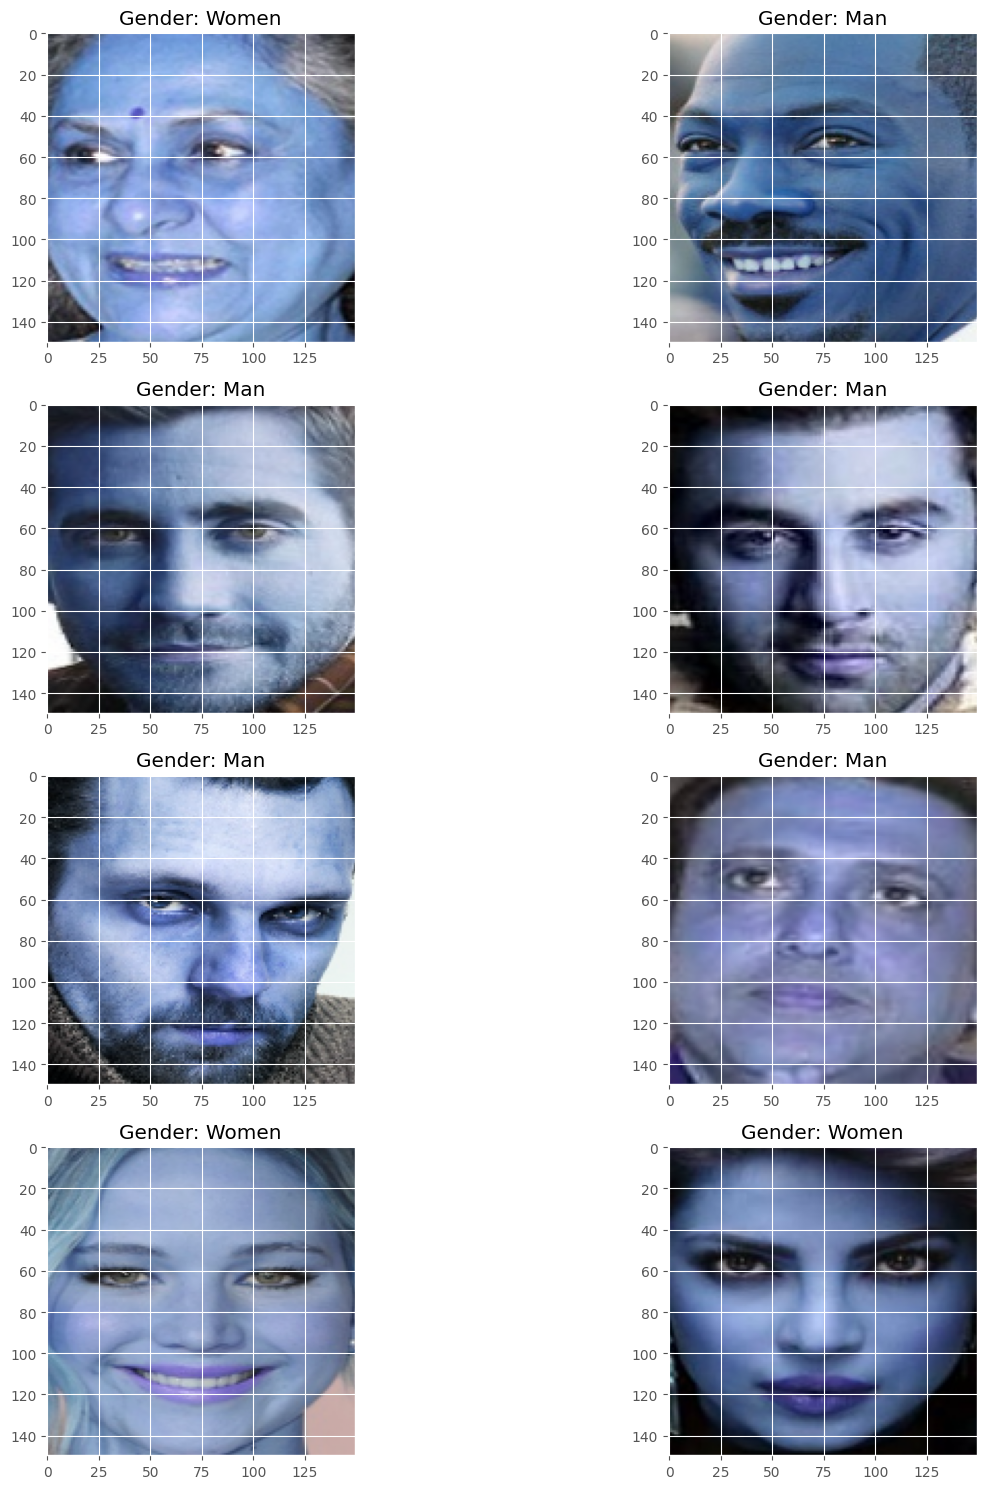

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)

for i in range(4):
  for j in range(2):
    l = rn.randint(0,len(Y))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Gender: '+str(Y_original[l]))

plt.tight_layout()

plt.savefig('Gender_After_Encoding.png')

#### **TRAINING AND VALIDATION SPLIT**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(1730, 150, 150, 3)
(577, 150, 150, 3)
(1730, 2)
(577, 2)


#### **SETTING RANDOM SEEDS**

* To generate same sequence of random numbers every time while running the code.

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### **MODELING**

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same',
                  activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides = (2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(2, activation = 'softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,142,210 (15.80 MB)

 Trainable params: 4,142,210 (15.80 MB)

 Non-trainable params: 0 (0.00 B)

### **MODEL VISUALIZATION**

   To view above CNN model architecture

   * To generate model structure - **keras.utils.plot_model**

   * show_shape - to know the data dimension

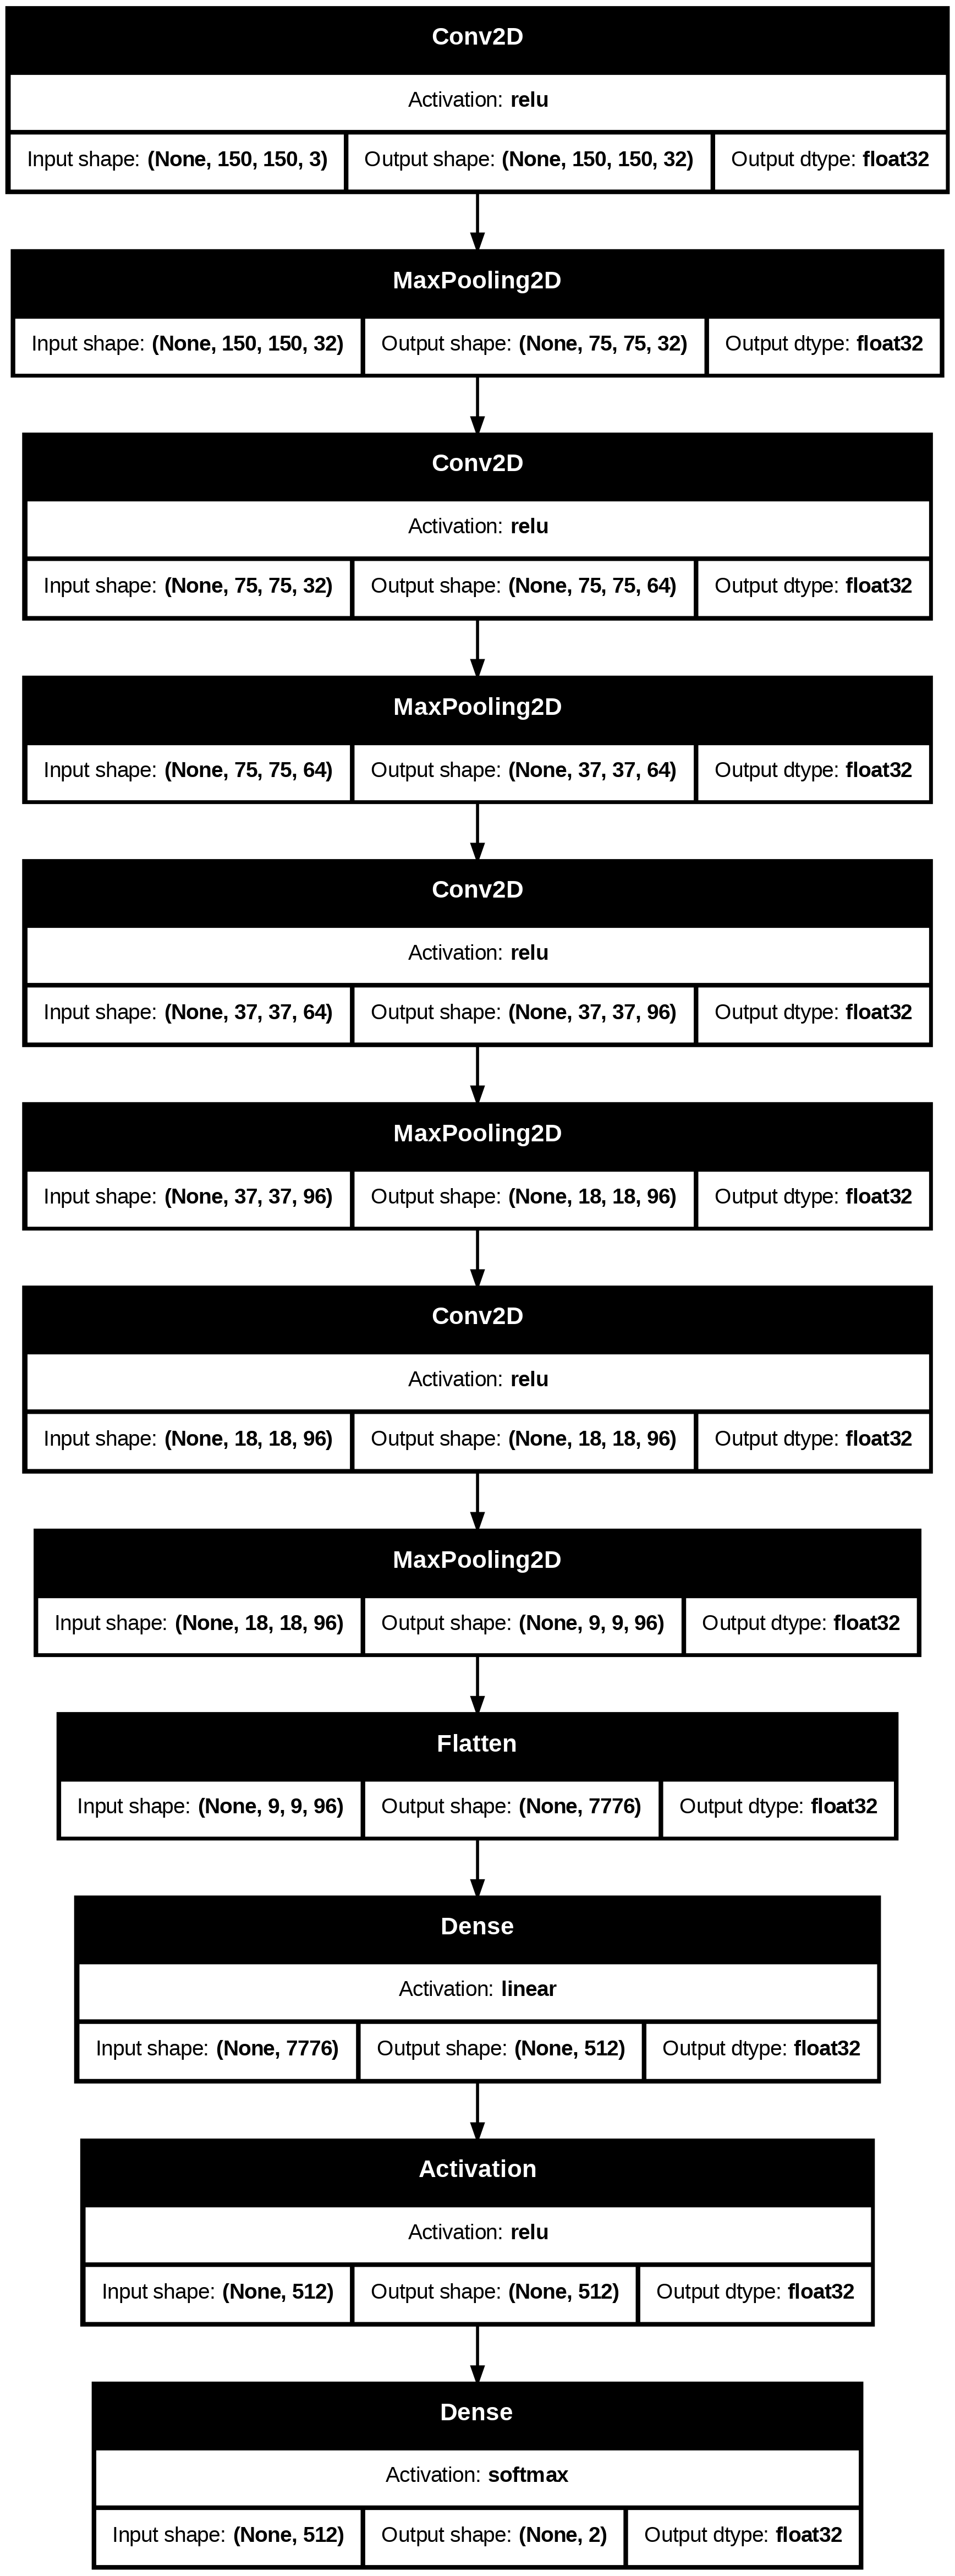

In [ ]:
from IPython.display import display,Image

keras.utils.plot_model(model,
                       to_file ='model_architecture_gender.png',
                       show_shapes = True,
                       show_dtype = True,
                       show_layer_activations = True)

display(Image(filename = 'model_architecture_gender.png', width = 500))

From the above architecture,

* Conv2D layer with ReLU activation function and MaxPooling2D
       
    * Reduction in spatial dimensions of input image
* Flatten layer

    * Feature maps are flattened to 1D vector after many convolutional and pooling layer

* Dense layer(final layer)
        
   * to classify input into two category using softmax activation
     

#### **REDUCING LEARNING RATE**

when metric stops improving(training process plateaus)

* To help model converge better by taking smaller steps, till it reach optimal

* **ReduceLROnPlateau** - using callback in keras to reduce Learning rate of optimizer

* **monitor** - specifying metric(val_acc) to monitor

* **patience** - if monitor metrics does not improve for no of epochs, LR is reduced

* **Factor** - if LR reduced, it multiplies byfactor(0.1, 0.5) to decrease value

* **Minimum Learning Rate** - to ensure learning rate doesnt drop below certain value



In [ ]:
batch_size = 128
epochs = 50

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3,
                               verbose = 1, factor = 0.1)

Reducing the learning rate sometimes help model to find better convergence

#### **DATA AUGMENTATION**

To prevent model from overfitting

* Spliting data into training and validation sets

* Applying real time data augmentation on images using **ImageDataGenerator**

* **Rescaling** the image pixel values between the range(0,1)

* Using **random** **transformations** on image using
              * shear_range
              * zoom_range
              * horizontal_flip
To increase **variety in dataset** and to help model generalize better

* Read the image from directory and prepare batches of images for training using **flow_from_directory**

In [ ]:
Gen_data = ImageDataGenerator(featurewise_center = False,
                              samplewise_center = False,

                              featurewise_std_normalization = False,
                              samplewise_std_normalization = False,
                              zca_whitening = False,

                              rotation_range = 20,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              zoom_range = 0.2,


                              horizontal_flip = True,
                              vertical_flip = False)

Gen_data.fit(X_train)


### **COMPILING AND TRAINING** THE MODEL

In [ ]:
model.compile(optimizer =Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### FITTING THE **TRAINING SET**

To fit model on train data and validate them on test data

In [ ]:

history = model.fit(Gen_data.flow(X_train, Y_train, batch_size = batch_size),
                   epochs = epochs,
                   validation_data = (X_test,Y_test),
                   verbose = 1,
                   steps_per_epoch = X_train.shape[0]// batch_size,
                   callbacks = [reduce_lr])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 118s 9s/step - accuracy: 0.5355 - loss: 0.6986 - val_accuracy: 0.6395 - val_loss: 0.6635 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 713ms/step - accuracy: 0.6172 - loss: 0.6637 - val_accuracy: 0.5511 - val_loss: 0.6702 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 133s 9s/step - accuracy: 0.6294 - loss: 0.6438 - val_accuracy: 0.7400 - val_loss: 0.5613 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 885ms/step - accuracy: 0.7188 - loss: 0.5944 - val_accuracy: 0.6464 - val_loss: 0.6104 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 128s 10s/step - accuracy: 0.6675 - loss: 0.5909 - val_accuracy: 0.6464 - val_loss: 0.5881 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 855ms/step - accuracy: 0.6250 - loss: 0.6419 - val_accuracy: 0.6984 - val_loss: 0.5582 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 121s 9s/step - accuracy: 0.7037 - loss: 0.5680 - 

#### **SAVE THE MODEL**

* To avoid re-training


In [ ]:
model.save('Model.keras')
savedModel = load_model('Model.keras')

In [ ]:
savedModel

<Sequential name=sequential, built=True>

#### **EVALUATION**

* To check model performance by plotting them between the
   * no of epochs and loss
   * no of epochs and accuracy

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss by Model based on Epochs')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'test'])

plt.show()
plt.savefig('Models_loss.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy of Model based on Epochs')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'test'])

plt.show()
plt.savefig('Model_accuracy.png')

<Figure size 640x480 with 0 Axes>

#### **PREDICTION**

By visualizing the predictions on validation set

* Checking if the model has correctly predicted the gender on validation set

In [ ]:
pred = model.predict(X_test)
pred_digits = np.argmax(pred, axis = 1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 484ms/step


In [ ]:
pred_digits

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

Seperating and storing both correctly and misclassified image indexes

In [ ]:
i = 0
correctly_classified = []
misclassified        = []

for i in range(len(Y_test)):
  if(np.argmax(Y_test[i])== pred_digits[i]):
    correctly_classified.append(i)
  if(len(correctly_classified)==8):
    break

i = 0
for i in range(len(Y_test)):
  if(not np.argmax(Y_test[i]== pred_digits[i])):
    misclassified.append(i)
  if(len(misclassified)==8):
    break

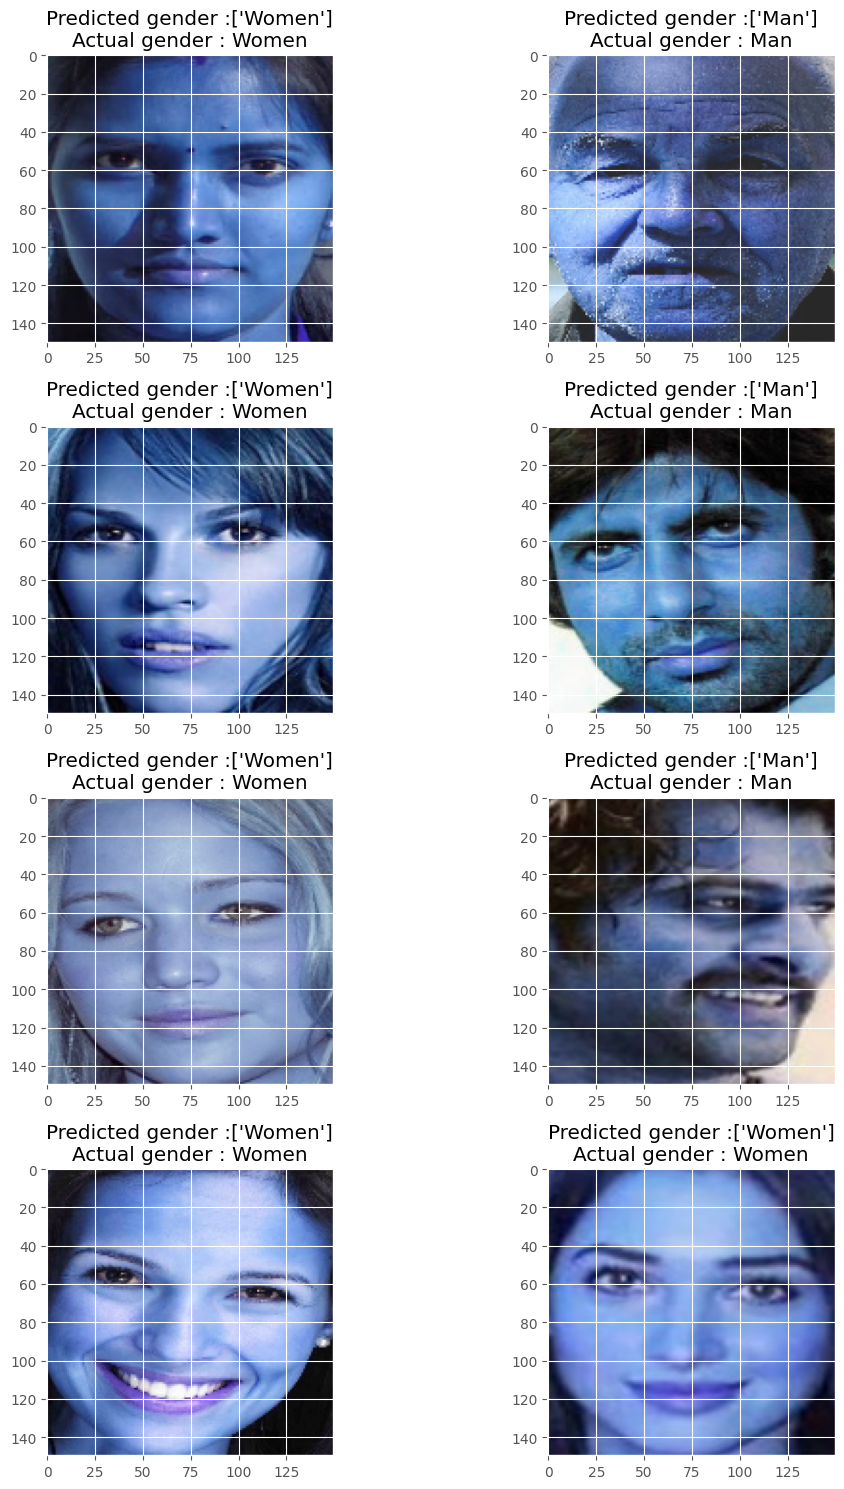

In [ ]:
count = 0
fig,ax= plt.subplots(4,2)
fig.set_size_inches(15,15)

for i in range(4):
  for j in range(2):
    ax[i,j].imshow(X_test[correctly_classified[count]])

    ax[i,j].set_title('Predicted gender :'+str(LE.inverse_transform([pred_digits[correctly_classified[count]]]))
                  +'\n'+ 'Actual gender : '+str(LE.inverse_transform([np.argmax(Y_test[correctly_classified[count]])])[0]))
    plt.tight_layout()
    count+=1

    plt.savefig('Correctly_classified_gender.png')

#### **MODEL ACCURACY**

* To check the performance of the model

first convert Encoded Y_test to integer label

In [ ]:
Y_test_label = np.argmax(Y_test, axis = 1)

In [ ]:
accuracy = accuracy_score(Y_test_label, pred_digits)
print(f'Accuracy of the model is : {accuracy}')

Accuracy of the model is : 0.9393414211438474


#### **PRECISION**

* Precison of proportion of  sample for each class in test set calculated using average = 'weighted'

In [ ]:
Precision = precision_score(Y_test_label, pred_digits, average = 'weighted')
print(f'Precision of the model is : {Precision}')

Precision of the model is : 0.9394534904469207


#### **CONFUSION MATRIX**

In [ ]:
con_matrix = confusion_matrix(Y_test_label, pred_digits)
print('Confusion Matrix for Gender Detection: ')
print(con_matrix)

* First row, represents the actual 'Man' instances of test set.

* Second row - representing the actual 'Woman'class in the test set.

Model correctly identified 281 men as men and predicted 267 womens correctly belongs to women class

#### **CLASSIFICATION REPORT**

* Provides more detailed evaluation of models performance per class.

* Includes precision, recall and f1-score

In [ ]:
class_report = classification_report(Y_test_label, pred_digits)
print('Classification Report for Gender Detection')
print(class_report)

#### **RESULT**

* Model reached validation accuracy of 93% and its performance is good

* The model's performance for each class is displayed on the confusion matrix's diagonal

* Model has learned some useful features to distinguish between the gender classes

The model is trained on the pre-processed data and hence is able to determine the gender of the face image.

#### **THANK YOU**